# Method: Free Energy Minimization

A detail description of this method can be found in our paper (Ref). Briefly, we defined a free energy of data, and showed that minimizing this free energy leads to an effective estimation of interactions. The algorithm of our method contains the following steps:

(i) Initialize $W_{ij}$ at random;

(ii) Compute local field $H_i(t) = \sum_j W_{ij} \sigma_j (t)$;

(iii) Compute data energy $$E_i(t) =  {{\sigma_i(t+1)} \over {\langle  \sigma(t+1) \rangle_{\text{model}}}}  H_i(t), $$ where $\langle  \sigma(t+1) \rangle_{\text{model}}$ represents model expectation;

(iv) Extract coupling $W_{ij}^\text{new}= \sum_k \langle \delta E_i \delta \sigma_k  \rangle [C^{-1}]_{kj}$, where  $\langle \cdot \rangle$ represents sample mean,  $\delta f \equiv f -\langle f\rangle$ and $C_{jk} \equiv \langle \delta\sigma_j\delta\sigma_k\rangle$;

(v) Repeat (ii)-(iv) until the discrepancy between observed $\sigma_i(t+1)$ and model expectation 
$\langle  \sigma(t+1) \rangle_{\text{model}}$, $D_i(W) = \sum_{t} \big[ \sigma_i(t+1) - \langle \sigma_i(t+1) \rangle_{\text{model}} \big]^2$  starts to increase;

(vi) Compute (ii)-(iv) in parallel for every variable index $i \in \{1, 2, \cdots, N\}$.

In the following, we will test the performance of our method in inferring couplings $W_{ij}$ from binary data ($\sigma_i(t)=\pm1$) that are generated from the kinetic Ising model. We will show that our method work well even in the hard regimes of small sample sizes and large coupling variance.

First of all, we import the packages to the notebook:

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

The couplings are normally distributed with zero mean and variance equal to $g^2/N$ which is known as Sherrington-Kirkpatrick model.

As a first axample, we consider a system of $N = 100$ variables, and coupling variance parameter $g = 2.0$

In [2]:
# parameter setting:
n = 100    # number of variables
g = 2.0    # coupling variance

w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

The heat map of the actual coupling matrix `W0` is plotted:

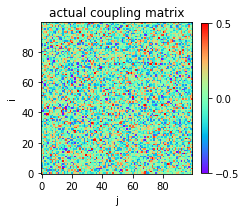

In [3]:
plt.figure(figsize=(3,3))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])
plt.show()

By using function `simulate.simulate_data`, we then generate time series of variable states according to the kinetic ising model. The data length $L = 2000$ is used.

In [4]:
l = 2000
s = simulate.generate_data(w0,l)

Raster of variable configuration `s` is plotted:

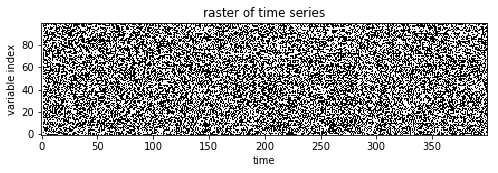

In [5]:
plt.figure(figsize=(8,3))
plt.title('raster of time series')
plt.imshow(s.T[:,:400],cmap='gray',origin='lower')
plt.xlabel('time')
plt.ylabel('variable index')
plt.show()

Now, from the time series, we recover the coupling matrix.


In [6]:
niter = 100
w = inference.fem(s,niter)

We plot the heat map of predicted coupling matrix `W` and compare with the actual couplings `W0`:

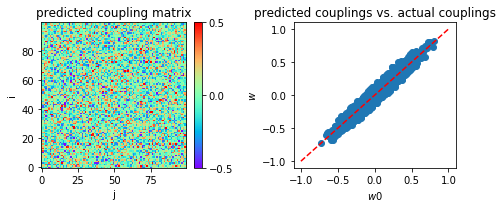

In [7]:
plt.figure(figsize=(7,3))

plt.subplot2grid((1,2),(0,0))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,2),(0,1))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

The inference accuracy is measured by mean square error between actual couplings and predicted couplings: MSE = $\frac{1}{N^{2}} \sum_{i,j=1}^N (W_{ij} - W_{ij}^{\text{actual}})$ 

In [8]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0022216772706863709)


large coupling variance

In [13]:
g = 4.0    # coupling variance

w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

l = 2000
s = simulate.generate_data(w0,l)

niter = 100
w = inference.fem(s,niter)

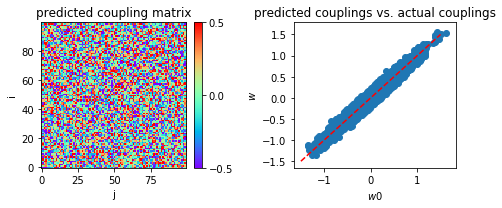

In [16]:
plt.figure(figsize=(7,3))

plt.subplot2grid((1,2),(0,0))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,2),(0,1))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1.5,1.5],[-1.5,1.5],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [15]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0053419181777409307)
